In [1]:
# 5_monthly_job_posting_for_India

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [6]:
df['job_posted_month_num'] = df['job_posted_date'].dt.month
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')


In [7]:
df[['job_posted_date','job_posted_month_num','job_posted_month']].sort_values(by='job_posted_date',ascending=True)

,job_posted_date,job_posted_month_num,job_posted_month
108804,2023-01-01 00:00:04,1,January
96906,2023-01-01 00:00:07,1,January
98438,2023-01-01 00:00:22,1,January
110290,2023-01-01 00:00:24,1,January
72158,2023-01-01 00:00:27,1,January
...,...,...,...
362129,2023-12-31 23:40:31,12,December
351830,2023-12-31 23:40:31,12,December
327439,2023-12-31 23:40:32,12,December
112373,2023-12-31 23:59:58,12,December


In [10]:

particular_job_titles = ['Data Analyst','Data Scientist','Data Engineer']
Job_in_India = df[df['job_country'] == 'United States']
pivot_trend = Job_in_India.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
pivot_trend.reset_index(inplace=True)
pivot_trend['month_num'] = pd.to_datetime(pivot_trend['job_posted_month'],format='%B').dt.month
pivot_trend.sort_values(by='month_num',inplace=True)
pivot_trend.set_index('job_posted_month',inplace=True)
pivot_trend.drop(columns='month_num',inplace=True)
# pivot_trend = pivot_trend[particular_job_titles]
pivot_trend 



job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [21]:
dev_jobs = pd.read_csv('https://lukeb.co/software_csv',index_col='job_posted_month')

In [32]:
df_us_jobs = pivot_trend.merge(dev_jobs,on='job_posted_month')
df_us_jobs 


,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
September,897,50,4639,3224,4568,113,805,775,1014,228,14016,8447,6139,4094


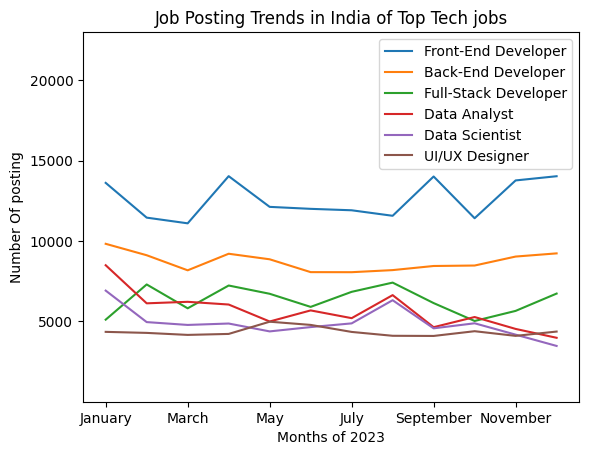

In [76]:
df_us_jobs_merged = df_us_jobs 
top_6 = df_us_jobs_merged.sum().sort_values(ascending=False).head(6).index.to_list()
df_us_jobs_merged[top_6].plot()
plt.title('Job Posting Trends in India of Top Tech jobs')
plt.xlabel('Months of 2023')
plt.ylabel('Number Of posting')
plt.ylim(1,23000)
plt.legend()
plt.show()